Сборный проект - 1


# Показатели успешности компьютерных игр



Исследование закономерностей определяющих успешность компьютерных игр на основе исторических данных о продажах.

Интернет магазину «Стримчик», торгующему по всему миру компьютерными играми требуется спланировать рекламные кампании на будущий 2017 год. Что бы сделать ставку на потенциально популярный продукт, нужно знать какие факторы влияют на успешность игр. В нашем распоряжении исторические данные из открытых источников о продажах на разных рунках до 2016 года. В данных так же сождержится информация о рейтингах игр, платформах на которых они были выпущены, год издания и жанр. 

Суть исследования -- определить какие переменные сильнее влияют на количество проданных копий.



## Содержание
1. [**Изучение данных**](#1.-Изучение-данных)


2. [**Подготовка данных**](#2.-Подготовка-данных)
    - [Регистр наименований столбцов](#Регистр-наименований-столбцов)
    - [Суммарные продажи](#Столбец-"Суммарные-продажи")
    - [Наименование](#Наименование)
    - [Год выпуска](#Год-выпуска)
    - [Оценки и рейтинги](#Оценки-и-рейтинги)
    
    
3. [**Анализ данных**](#3.-Анализ-данных)
    - [Выпуск по годам](#Выпуск-по-годам)
    - [Продажи по платформам](#Платформа)
    - [Выбор актуального периода](#Выбор-актуального-периода)
    - [Платформы-лидеры](#Платформы-лидеры)
    - [Влияние на продажи отзывов](#Влияние-на-продажи-отзывов)
    - [Анализ жанров](#)
    
    
4. [**Портрет пользователя**](#4.-Портрет-пользователя)
    - [Рейтинг платформ](#Рейтинг-платформ)
    - [Рейтинг жанров](#Рейтинг-жанров)
    - [Рейтинг ESRB и продажи](#Рейтинг-ESRB-и-продажи)
    
    
5. [**Проверка статистических гипотез**](#5.-Проверка-статистических-гипотез)
    - [Средние пользовательские рейтинги Xbox One и PC](#Средние-пользовательские-рейтинги-Xbox-One-и-PC)
    - [Средние пользовательские рейтинги жанров Action и Sports](#Средние-пользовательские-рейтинги-жанров-Action-и-Sports)
    
    
6. [**Общий вывод**](#6.-Общий-вывод)


## 1. Изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
pd.set_option('display.precision', 3)
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
games = pd.read_csv('/datasets/games.csv')
games.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
6460,Ford Racing 3,PS2,2004.0,Racing,0.13,0.10,0.00,0.03,50.0,6.6,E
13443,Wrath Unleashed,XB,2004.0,Strategy,0.03,0.01,0.00,0.00,69.0,7,T
9328,Bratz,GBA,2002.0,Platform,0.10,0.04,0.00,0.00,NaN,tbd,E
14357,Mystery Case Files: Ravenhearst,PC,2007.0,Puzzle,0.01,0.02,0.00,0.01,NaN,tbd,E10+
2014,Tomb Raider,PC,1996.0,Action,0.96,0.07,0.00,0.00,86.0,8.5,M
7234,Asphalt: Injection,PSV,2011.0,Action,0.13,0.06,0.00,0.03,49.0,4.8,E10+
13258,Jikkyou Oshaberi Parodius,SNES,1995.0,Shooter,0.00,0.00,0.05,0.00,NaN,NaN,NaN
7640,Cabela's Big Game Hunter (2008),PS2,2007.0,Sports,0.10,0.08,0.00,0.03,NaN,tbd,T
3807,Star Fox Command,DS,2006.0,Shooter,0.38,0.01,0.10,0.04,76.0,7.3,E10+
10916,Uta no Prince-Sama: Debut,PSP,2012.0,Adventure,0.00,0.00,0.09,0.00,NaN,NaN,NaN


In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходные данные представляют собой список игр с параметрами

количественными: год выпуска, выручка, оценки критиков и оценки пользователей

и категоориальными: платформа, жанр, рейтинг.


Основные пропуски в данных в столбцах с оценками и рейтингом. Также пропуски есть в наименованиях игр и в годе выпуска. Тип данных `Year_of_Release` – float, следует отредактировать.

Тип данных столбца `user_score` object, из-за того что в нем присутствует нечисловое значение "tbd".


## 2. Подготовка данных

### Регистр наименований столбцов

In [4]:
print(games.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


Отредактируем названия столбцов. Приведем к нижнему регистру.

In [5]:
games.columns = games.columns.str.lower()

### Столбец "Суммарные продажи"

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец `total_sales`.

In [6]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [7]:
games.head(3)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


### Наименование

В столбце `name` есть два пропуска

In [8]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


У них также отсутствует жанр и какие либо рейтинги. В нашем исследовании пользы от таких данных будет немного, к тому же их продажи практически нулевые. Удалим эти записи.


In [9]:
games.dropna(subset=['name'], inplace=True)

### Год выпуска

Изменим тип данных. Тип DateTime можно не применять нам хватит целочисленного.

In [10]:
games['year_of_release'] = pd.to_numeric(games['year_of_release'], errors='coerce', downcast='integer') 

In [11]:
# подсчитаем сколько пустых значений
games['year_of_release'].isna().sum()

269

269 пропущенных значения. Их  можно заменить характерным значением для игры выпущенной на такой же платформе. Метод очень грубый,  позволит определить год с точностью до десятилетия,  нам этого достаточно. За исключением PC, в среднем продуктивный срок выпуска игр на платформе – 10 лет:

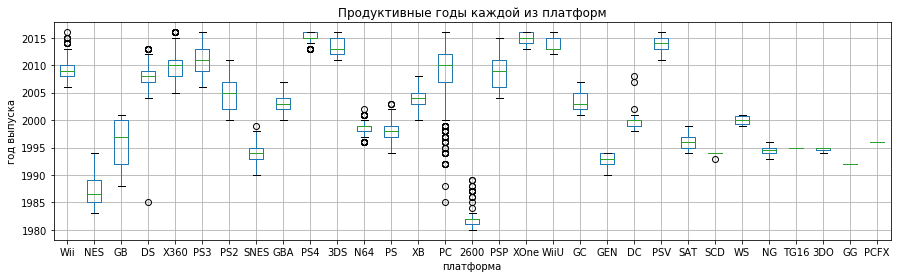

In [12]:
platform_years = pd.DataFrame(columns=games['platform'].unique(), index=games.index) 

for i in platform_years.columns:
    platform_years[i] = games.loc[games['platform'] == i]['year_of_release']

platform_years.boxplot(figsize=(15, 4))
plt.grid(True)
plt.title('Продуктивные годы каждой из платформ')
plt.xlabel("платформа")
plt.ylabel("год выпуска")    
plt.show()

За небольшим исключением, игры на каждой платформе выпускались не более десяти лет. Потом игровая платформа устаревала, а ей на смену приходила более современная.

In [13]:
games['year_of_release'] = games.groupby('platform')['year_of_release'].apply(lambda x: x.fillna(x.median()))

In [14]:
games['year_of_release'] = games['year_of_release'].astype('int64')

Заменили тип данных на целочисленный и заполнили пропуски значениями характерными для соответсвующей платформы (медианами)

### Оценки и рейтинги

Изменим тип данных столбца `user_score`. Перед этим разберемся со значением "tbd" ("To Be Determined" то есть "Будет определено"). 

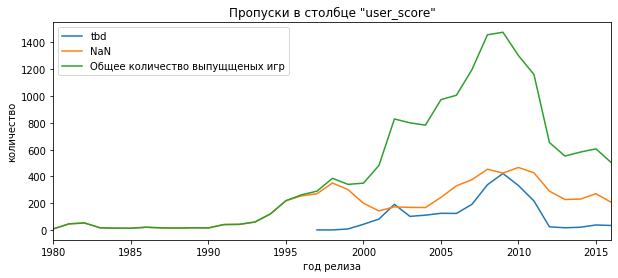

In [15]:
ax1 = games.query('user_score == "tbd"').groupby('year_of_release')['name'].count().plot(label="tbd", figsize=(10, 4))
ax2 = games[games['user_score'].isna()].groupby('year_of_release')['year_of_release'].count().plot(label="NaN")
ax3 = games.groupby('year_of_release')['name'].count().plot(label="Общее количество выпущщеных игр")

ax1.legend()
ax1.set_title('Пропуски в столбце "user_score"')
plt.xlabel("год релиза")
plt.ylabel("количество")
plt.show()

Доля игр с рейтингом "tbd" (как и доля игр с пропущеенным значением) примерно одна и та же от года к году. Значит причина этих пропусков не сильно связана с годом издания.

Посмотрим зависит ли отметка "tbd" от платформы.

In [16]:
# распределение в процентах по платформам
games.query('user_score == "tbd"')['platform'].value_counts(normalize=True)


DS      0.312
Wii     0.182
GBA     0.108
PS2     0.099
XB      0.062
PSP     0.051
GC      0.042
PS3     0.036
X360    0.035
3DS     0.023
PC      0.020
PS      0.019
XOne    0.005
PSV     0.003
PS4     0.002
WiiU    0.002
Name: platform, dtype: float64

Количество игр спользовательским рейтингом "tbd" распределено по платформам неравномерно. 
Почти треть всех таких неопределенных приходится на Nintendo DS.


Можно предположить, что пользовательский рейтинг мог быть обозначен "tbd" для крайне непопулярных игр (то есть с очень низкими продажами).

In [17]:
# самый простой способ посчитать средние продажи для tbd, и non_tbd и заодно NaN
print(f'Среднее значение общих продаж для игр со значением user_score = tbd', games.query('user_score == "tbd"')['total_sales'].mean())
print(f'Среднее значение общих продаж для игр со значением user_score = NaN', games.query('user_score.isna()')['total_sales'].mean())
print(f'Среднее значение общих продаж для игр с другим значением user_score', games.query('user_score != "tbd" and user_score != "NaN"')['total_sales'].mean())

Среднее значение общих продаж для игр со значением user_score = tbd 0.18816006600660068
Среднее значение общих продаж для игр со значением user_score = NaN 0.4249499925361995
Среднее значение общих продаж для игр с другим значением user_score 0.5918671705507733


In [18]:
print(f'Медиана общих продаж для игр со значением user_score = tbd', games.query('user_score == "tbd"')['total_sales'].median())
print(f'Медиана общих продаж для игр со значением user_score = NaN', games.query('user_score.isna()')['total_sales'].median())
print(f'Медиана общих продаж для игр с другим значением user_score', games.query('user_score != "tbd" and user_score != "NaN"')['total_sales'].median())


Медиана общих продаж для игр со значением user_score = tbd 0.11
Медиана общих продаж для игр со значением user_score = NaN 0.11
Медиана общих продаж для игр с другим значением user_score 0.19


В группе игр с рейтингом tbd отсутствуют лидеры продаж, которые сдвинули среднее значение в большую сторону. Скорее всего это неудачные, не пошедшие в широкий тираж игры. 

In [19]:
# изменим тип object на float, и заменим tbd на Nan
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')

Меняем "tbd" на "Nan". Пропуски оставляем как есть.

#### Рейтинг ESRB

Заполним пропущенные значения в столбце `rating` маркером `NoInfo`.

In [20]:
games['rating'] = games['rating'].fillna(value='NoInfo')

#### Дубликаты


Проверим на наличие полных дубликатов

In [21]:
games.duplicated().sum()

0

Дубликаты отсутствуют

Что бы с данными можно было работать мы произвели неоходимый минимум.  Привели заголовки столбцов к нижнему регистру, подсчитали суммарные продажи, заполнили пропуски годвыпуска характерными значениями. Пропуски в  в столбцах с рейтингом заполнять не стали и удалять тоже.

## 3. Анализ данных

### Выпуск по годам

Сразу посмотрим на какой период приходится основная часть данных.

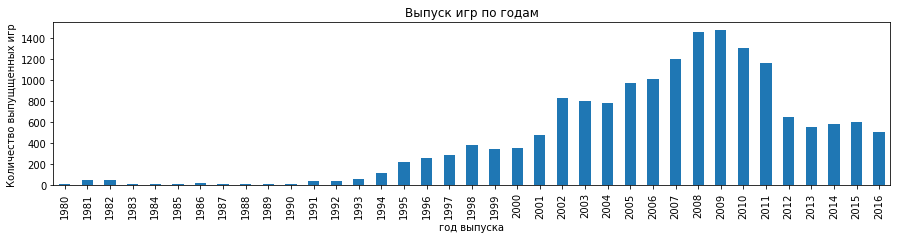

In [22]:
games.groupby('year_of_release')['name'].count().plot(kind='bar', figsize=(15, 3))

plt.title('Выпуск игр по годам')
plt.xlabel("год выпуска")
plt.ylabel("Количество выпущщенных игр")    
plt.show()

Основной объем приходится на период с конца 90-х по сегодняшенее время, максимум релизов пришелся на 2008-2009 годы. Для начала можно смело исключить данные до 1995 года как несущественные. 


### Продажи по годам

С 2012 года выпуск игр глобально снизился. Посмотрим, как это коррелирует с продажами.

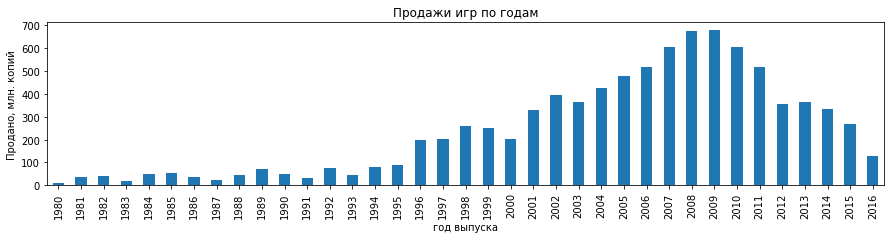

In [23]:
games.groupby('year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(15, 3))

plt.title('Продажи игр по годам')
plt.xlabel("год выпуска")
plt.ylabel("Продано, млн. копий")    
plt.show()

Видно что на фоне спада продолжающегося с 2009 года, в 2012 в глобальных продажах произошло скачкообразное снижение. Посмотрим как менялись продажи по платформам

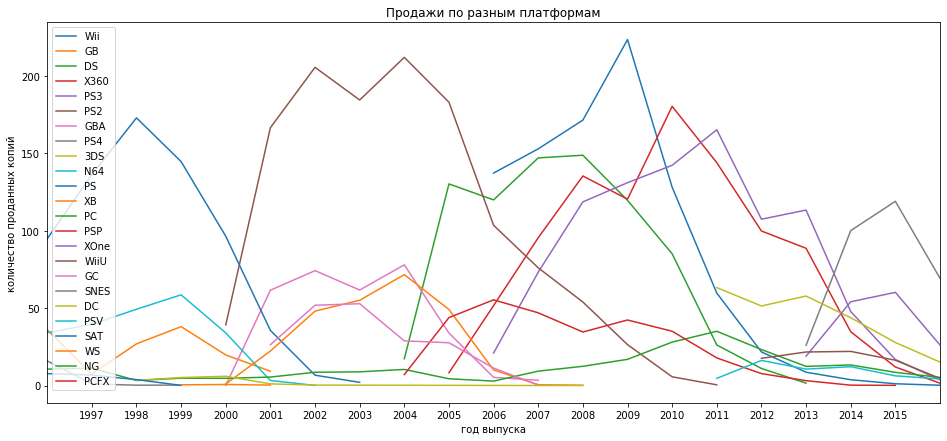

In [24]:
platform_list = games.query("year_of_release > 1995")['platform'].unique()
for i in platform_list:
    games[(games['platform'] == i) & (games['year_of_release'] > 1995
                                     )].groupby('year_of_release')['total_sales'].sum().plot(figsize=(16, 7), label=i)
plt.xticks(np.arange(1997, 2016 , step=1))
plt.legend()    
plt.title('Продажи по разным платформам')
plt.xlabel("год выпуска")
plt.ylabel("количество проданных копий")    
plt.show()

Каждая платформа переживает сходный жизненный цикл: резкий рост продаж сразу после выпуска платформы, примерно пять лет продаж на стабильном уровне, и плавный спад. 
На конец 2016 года из 9 продающихся платформ 7 переживают заключительный спад. 

Можно выдвинуть предположение, что с выпуском новых платформ PS4 и Xbox One произошла задержка, по этому в 2012 произошло падение и по выпуску новых игр и по продажам старых. Если бы они вышли на год раньше то провала не было бы. 

### Платформы

Посмотрим на каких платформах за все время было выпущено больше игр

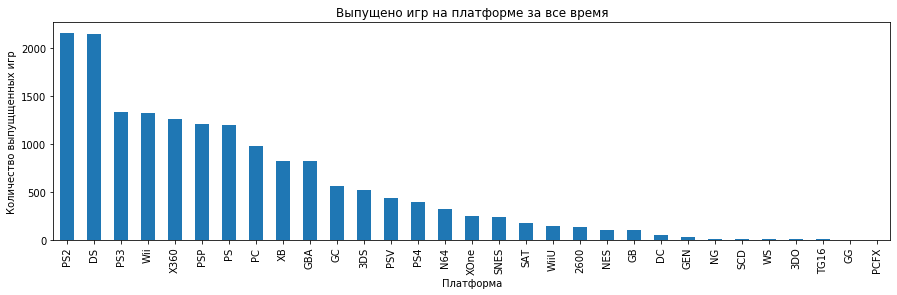

In [25]:
games['platform'].value_counts().plot(kind='bar', figsize=(15, 4))

plt.title('Выпущено игр на платформе за все время')
plt.xlabel("Платформа")
plt.ylabel("Количество выпущщенных игр")    
plt.show()

Посмотрим на каких платформах за все время суммарные продажи были больше.

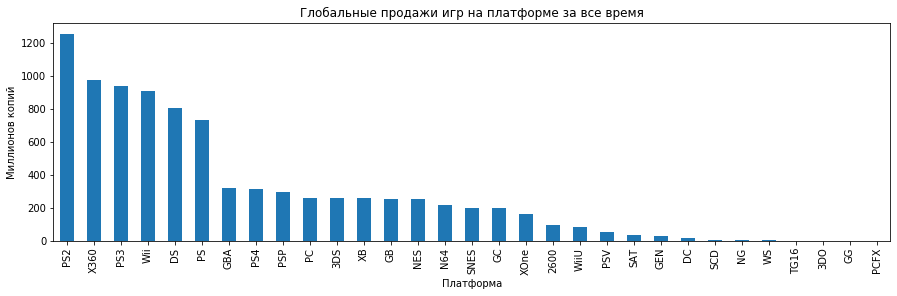

In [26]:
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(15, 4))
plt.title('Глобальные продажи игр на платформе за все время')
plt.xlabel("Платформа")
plt.ylabel("Миллионов копий")
plt.yticks(np.arange(0, 1400 , step=200))
plt.show()

Отчетливо выделяется шестерка лидеров по глобальной выручке, и эта шестерка так же лидирует по выпуску.

In [27]:
# считаем срок жизни платформ и сохраняем в таблицу отсортировав по сроку жизни
platform_life = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['life'] = platform_life['max'] - platform_life['min']
platform_life = platform_life.sort_values('life', ascending=False).reset_index()
platform_life

,platform,min,max,life
0,PC,1985,2016,31
1,DS,1985,2013,28
2,GB,1988,2001,13
3,X360,2005,2016,11
4,PSP,2004,2015,11
5,PS2,2000,2011,11
6,NES,1983,1994,11
7,DC,1998,2008,10
8,Wii,2006,2016,10
9,PS3,2006,2016,10


In [28]:
platform_life['life'].median()

6.0

В рейтинге продолжительности жизни платформ лидирует PC. В отличие от прочих платформ, PC эволюционирует под одним и тем же именем.

In [29]:
# сохраняем платформы долгожители в список
long_life_platform_list = platform_life['platform'].head(13)

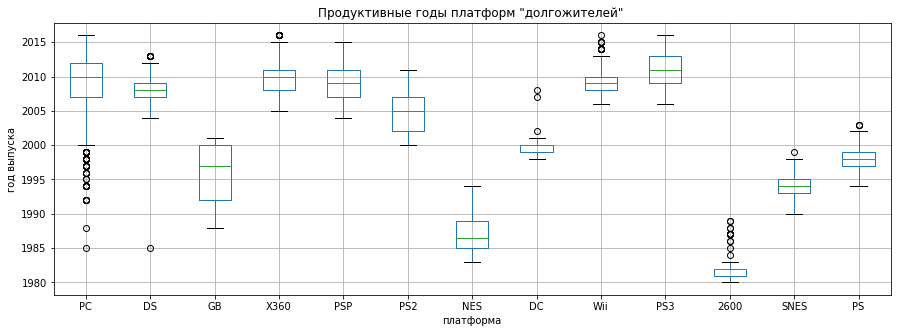

In [30]:
long_life_platform_years = pd.DataFrame(columns=long_life_platform_list, index=games.index) 

for i in long_life_platform_list:
    long_life_platform_years[i] = games.loc[games['platform'] == i]['year_of_release']

long_life_platform_years.boxplot(figsize=(15, 5))
plt.grid(True)
plt.title('Продуктивные годы платформ "долгожителей" ')
plt.xlabel("платформа")
plt.ylabel("год выпуска")    
plt.show()

Примечательно, что все что выпущено на PC до 2000 года можно считать выбросами. 
А следующий "долгожитель" платформа Nintendo DS таковым не является, так как была выпущена в 2004году. Все что в значится до этого года ошибки в данных.

Рассчитаем среднюю продолжительность.

In [31]:
# исправим ошибку на год когда игра вышла на самом деле.
games.loc[(games['platform'] == 'DS') & (games['year_of_release'] == 1985)] = 2007

In [32]:
# пересчитаем срок жизни платформ и сохраняем в таблицу отсортировав по сроку жизни
platform_life = games.groupby('platform')['year_of_release'].agg(['min', 'max'])
platform_life['life'] = platform_life['max'] - platform_life['min']
platform_life = platform_life.sort_values('life', ascending=False).reset_index()

# исключим актуальные платформы, которые в 2016 году выпускали игры
platform_life = platform_life.drop(platform_life[platform_life['max'] == 2016].index)
# исключим платформы начала 1990 которые существовали меньше года
platform_life = platform_life.drop(platform_life[platform_life['life'] < 1].index)

# посчитаем среднее значение продолжительности
platform_life['life'].mean()


7.105263157894737

Средний срок жизни платформы 7 лет.

Так как у нас на конец 2016 года осталось всего две актуальные платформы PS4 и XboxOne, можно уточнить наш расчет взяв во внимание только предыдущие поколения PS и Xbox. 

In [33]:
top_platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

top_platform_life = games.query('platform in @top_platform_list').groupby('platform')['year_of_release'].agg(['min', 'max'])
top_platform_life['life'] = top_platform_life['max'] - top_platform_life['min']
top_platform_life = top_platform_life.sort_values('life', ascending=False).reset_index()

# посчитаем среднее значение продолжительности
top_platform_life['life'].mean()

10.0

Срок продолжительности жизни платформы в среднем от 7 до 10. 7 лет если брать всю историю, 10 лет если смотреть только на лидеров рынка.

### Выбор актуального периода

Для дальнейшего исследования возьмем данные от 2012 года. Нужно ориентироваться на относительно современные игры и платформы, а так же на уровень продаж соответствующий сегодняшнему дню. 

In [34]:
games_act = games.query('year_of_release >= 2012')

### Платформы лидеры

Определим пратформы-лидеры по продажам и по выпуску на текущий момент.

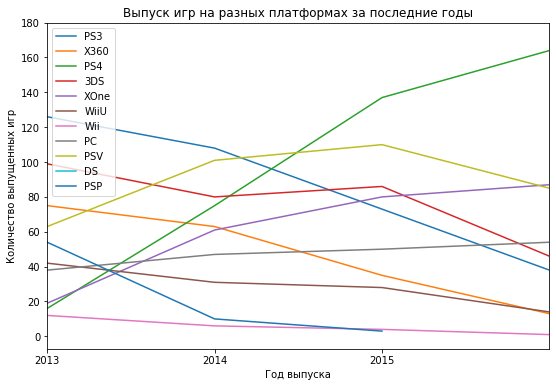

In [35]:
platform_list = games.query("year_of_release > 2012")['platform'].unique()
for i in platform_list:
    games[(games['platform'] == i) & (games['year_of_release'] > 2012)].groupby('year_of_release')['name'].count().plot(figsize=(9, 6), label=i)

plt.legend()    
plt.title('Выпуск игр на разных платформах за последние годы')
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")    
plt.xticks(np.arange(2013, 2016, step=1))
plt.yticks(np.arange(0, 200 , step=20))
plt.show()

Потенциально прибыльные платформы это в первую очередь платформы последнего поколения, релизы по которым растут. PS4, XboxOne и PC. Выпуск игр на остальных платформах снижается. 

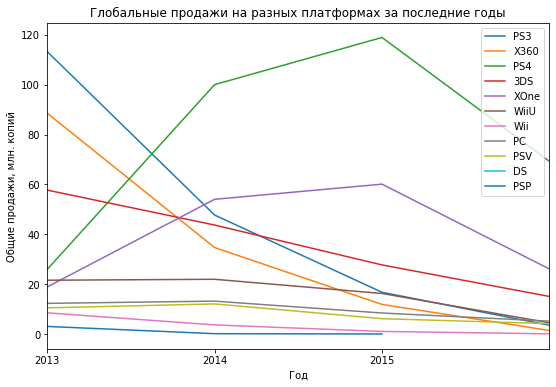

In [36]:
platform_list = games.query("year_of_release > 2012")['platform'].unique()
for i in platform_list:
    games[(games['platform'] == i) & (games['year_of_release'] > 2012)].groupby('year_of_release')['total_sales'].sum().plot(figsize=(9, 6), label=i)

plt.legend()    
plt.title('Глобальные продажи на разных платформах за последние годы')
plt.xlabel("Год")
plt.ylabel("Общие продажи, млн. копий") 
plt.xticks(np.arange(2013, 2016, step=1))
plt.yticks(np.arange(0, 130 , step=20))
plt.show()

В последние годы продажи у всех старых платформ снижаются, и только у двух новых PS4 и XboxOne растут.  


Потенциально прибыльными на 2017 год будут только PS4 и XboxOne, все остальные за последние годы показывают снижение продаж и сворачивают выпуск игр.

Построим распределение по количеству продаж по каждой из платформ.

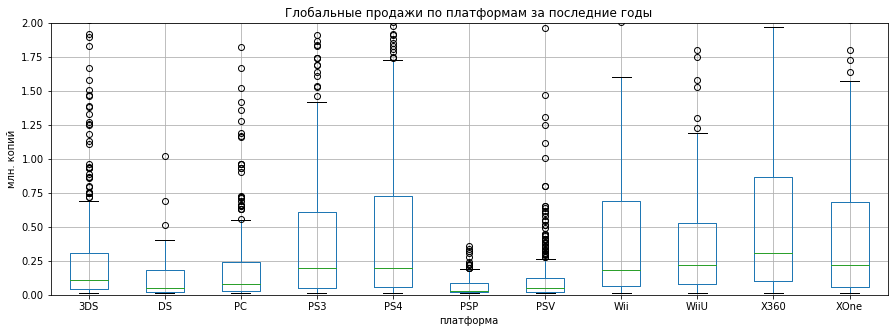

In [37]:

#platform_list = games_act['platform'].unique() # список 
 # порядок сортировки соответсвующий нижнему графику
platform_list = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU', 'X360', 'XOne']
platform_sales = pd.DataFrame(columns=platform_list, index=games.index) 

for i in platform_list:
    platform_sales[i] = games_act.loc[games_act['platform'] == i]['total_sales']


platform_sales.boxplot(figsize=(15, 5))
plt.grid(True)
plt.title('Глобальные продажи по платформам за последние годы')
plt.xlabel("платформа")
plt.ylim(0, 2)
plt.ylabel("млн. копий")    
plt.show()

Выбросы на диаграмме - это и есть по большей части самые успешные игры. В целом для основной массы игр характерны продажи меньше 500 тыс. копий. Бестселлеры же продаются миллионными тиражами.

Разницу разброса можно частично объяснить тем, что чем популярней платформа, тем шире разброс значений. <br> Игр пользователь покупает намного больше чем платформ. Скорее всего у пользователя одна платформа, а игры он может покупает регулярно. И через некоторое время в коллекции пользователя оказывается часть бестселлеров -- игр в которые играют все или почти все пользователи, и часть средних купленных рандомно -- попробовать. Чем сильнее распространена платформа? тем больше масса рандомнокупленных игр сглаживает распределение (См. диаграммы ниже).


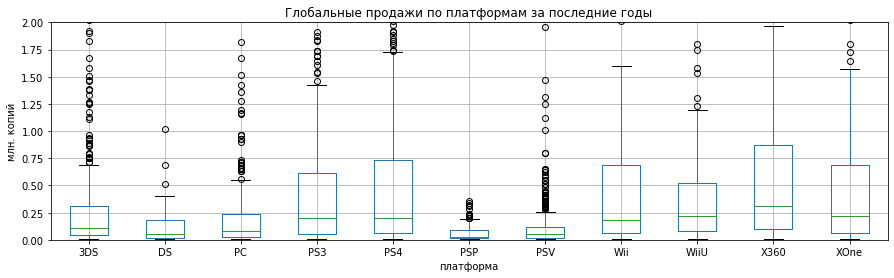

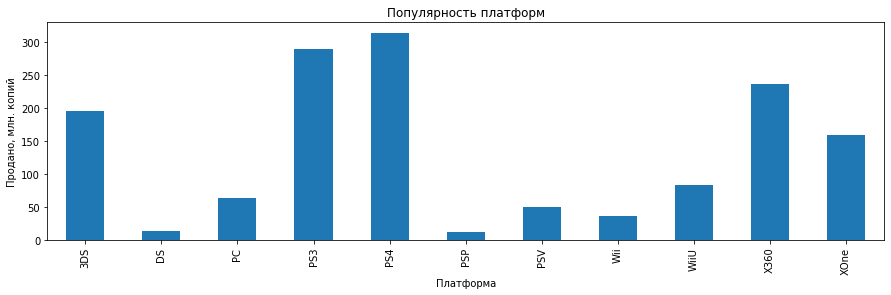

In [38]:
platform_sales.boxplot(figsize=(15, 4))
plt.grid(True)
plt.title('Глобальные продажи по платформам за последние годы')
plt.xlabel("платформа")
plt.ylim(0, 2)
plt.ylabel("млн. копий")    
plt.show()

games_act.query('platform in @platform_list').groupby('platform')['total_sales'].sum().plot(kind='bar', figsize=(15, 4))

plt.title('Популярность платформ')
plt.xlabel("Платформа")
plt.ylabel("Продано, млн. копий")    
plt.show()

### Влияние на продажи отзывов

Чтобы узнать есть ли связь между продажами построим диаграммы для топовых платформ

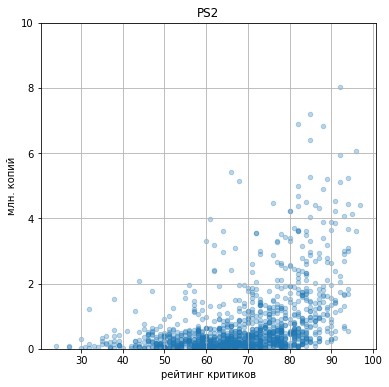

коэффициент корреляции: 0.39543454945454876


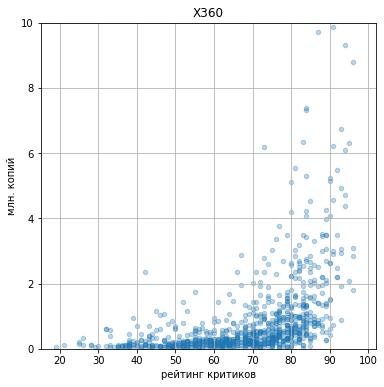

коэффициент корреляции: 0.3937358653072588


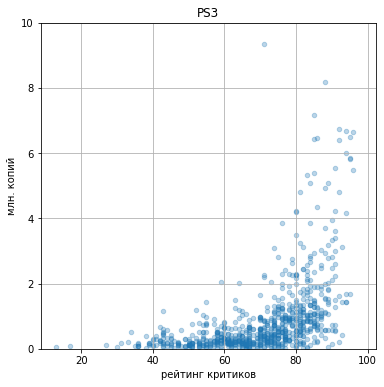

коэффициент корреляции: 0.4324315685642061


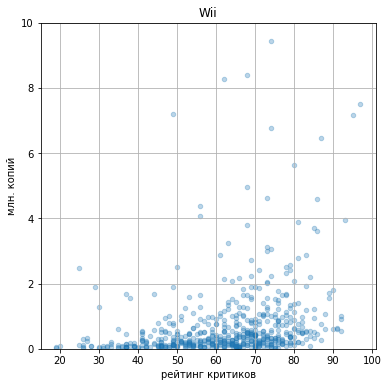

коэффициент корреляции: 0.17755988806089948


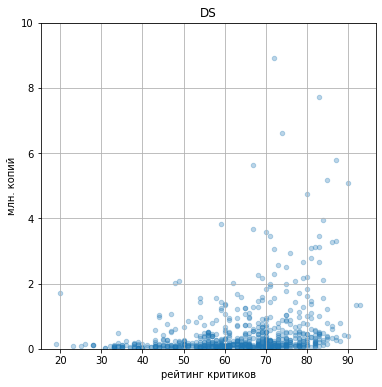

коэффициент корреляции: 0.23637945738859747


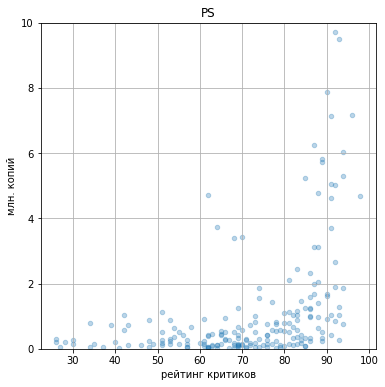

коэффициент корреляции: 0.44563998586242454


In [39]:
top_platform_list = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for i in top_platform_list:
    games.loc[games['platform'] == i].plot(
        x='critic_score', y='total_sales', kind='scatter', figsize =(6, 6), grid=True, alpha=0.3, title=i
    )
    
    plt.xlabel("рейтинг критиков")
    plt.ylim(0, 10)
    plt.ylabel("млн. копий")    
    plt.show()
    
    print('коэффициент корреляции:', 
          games.loc[games['platform'] == i]['critic_score']
          .corr(games.loc[games['platform'] == i]['total_sales'])
         )    

Коэффициент корреляции отличается от платформы к платформе, но не превышает 0,44. Это значит что коррелляция отсутствует. А следовательно нельзя говорить о каком либо влиянии оценок критиков на продажи. Зато можно говорить о влиянии высоких продаж на оценки критиков! Игры бестселлеры оцениваются ими, как правило, очень высоко.

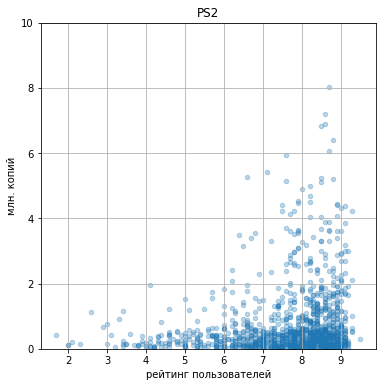

коэффициент корреляции: 0.17286551112058213


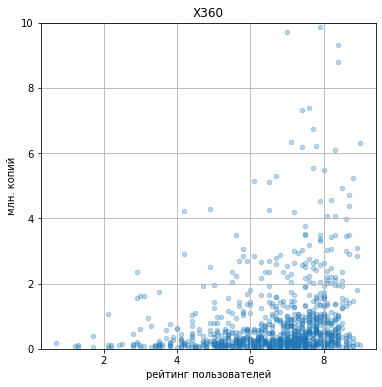

коэффициент корреляции: 0.11445882978454185


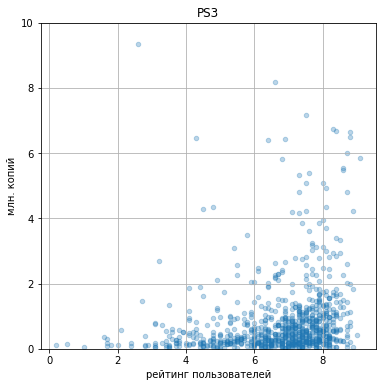

коэффициент корреляции: 0.12669133936341712


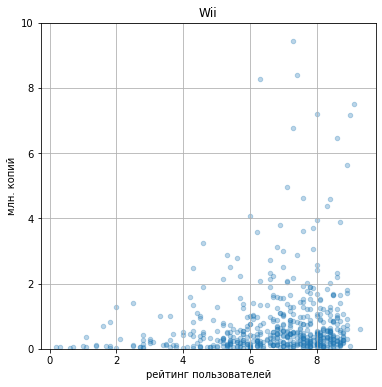

коэффициент корреляции: 0.11241436067003169


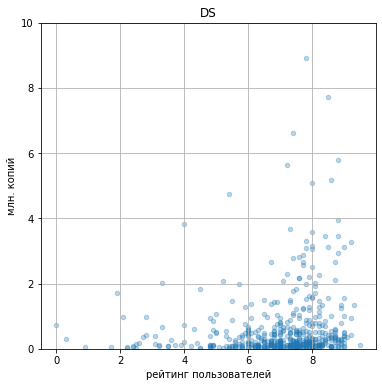

коэффициент корреляции: 0.1304355011164249


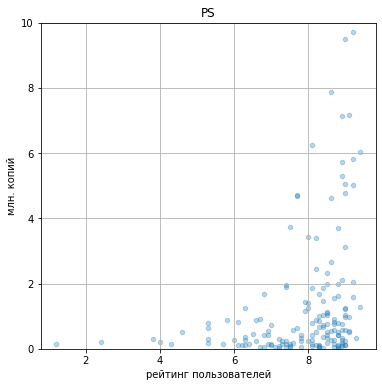

коэффициент корреляции: 0.29797783612684925


In [40]:
for i in top_platform_list:
    games.loc[games['platform'] == i].plot(
        x='user_score', y='total_sales', kind='scatter', figsize =(6, 6), grid=True, alpha=0.3, title=i
    )
    
    plt.xlabel("рейтинг пользователей")
    plt.ylim(0, 10)
    plt.ylabel("млн. копий")    
    plt.show()
    
    print('коэффициент корреляции:', 
          games.loc[games['platform'] == i]['user_score']
          .corr(games.loc[games['platform'] == i]['total_sales'])
         )    

С взаимосвязью продаж и рейтингом пользователей аналогичная ситуация, взаимосвязь отсутствует. А то небольшое количество игр с высокими продажами имеет высокие оценки.

Посмотрим игры каких жанров в среднем имеют выше продажи.

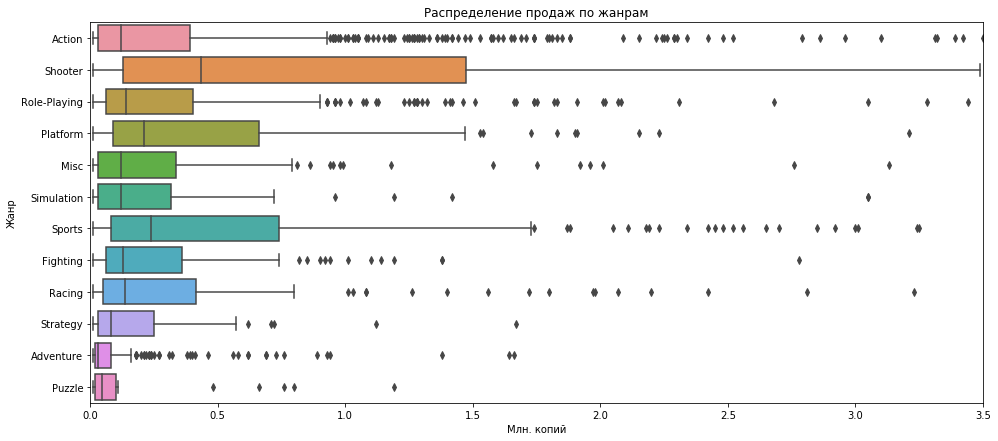

In [41]:
fig, ax = plt.subplots(figsize = (16, 7))
sns.boxplot(data = games_act, x= 'total_sales', y = 'genre', orient = 'h')
plt.xlim(0, 3.5)
plt.title('Распределение продаж по жанрам')
plt.xlabel("Млн. копий")
plt.ylabel("Жанр")    
plt.show()

Забегая вперед, игры жанра Action лидируют по общим продажам, оставляя Шутеры на втором месте. На этой диаграмме мы видим казалось бы противоположную картину. Шутеры имеют более высокое среднее количество проданных копий и более широкий разброс значений в сторону увеличения количества проданных копий.

Возможно средний уровень (качество) игр стреллялок выше а соответственно выше среднее количествро продаж.
А может быть в жанре стреллялок игры так похожи друг на друга, что пользователь не отличает их и покупает без особого разбора, и  остается удовлетворен.

То же самое, но в меньшей степени можно сказать про игры платформеры и спортивные.

## 4. Портрет пользователя

### Рейтинг платформ

Сравним по каждой из платформ на какой рынок приходится больше продаж в долях.

In [42]:
platform_rate = games_act.pivot_table(
    index='platform', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False).reset_index()

platform_rate['eu_sales'] = platform_rate['eu_sales'] / platform_rate['total_sales']
platform_rate['jp_sales'] = platform_rate['jp_sales'] / platform_rate['total_sales']
platform_rate['na_sales'] = platform_rate['na_sales'] / platform_rate['total_sales']

In [43]:
platform_rate.head(5)

,platform,eu_sales,jp_sales,na_sales,total_sales
0,PS4,0.449,0.051,0.346,314.14
1,PS3,0.370,0.122,0.358,288.79
2,X360,0.315,0.007,0.592,236.54
3,3DS,0.219,0.449,0.287,195.80
4,XOne,0.324,0.002,0.584,159.32


Одна и та же платформа не одинаково популярна в разных регионах. Можно условно обозначить Nintendo 3DS как японскую платформу, платформы Playstation как европейско-американские, а Xbox как американские.


Взглянем на продажи по регионам в другом разрезе: какой процент от общих продаж в регионе приходится на ту или иную платформу.

In [44]:
region_sales = games_act.pivot_table(
    index='platform', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False)
#region_sales

In [45]:
# пересчитываем абсолютные значения в проценты
region_sales['eu_sales'] = (region_sales['eu_sales'] / region_sales['eu_sales'].sum()).round(2)
region_sales['na_sales'] = (region_sales['na_sales'] / region_sales['na_sales'].sum()).round(2)
region_sales['jp_sales'] = (region_sales['jp_sales'] / region_sales['jp_sales'].sum()).round(2)

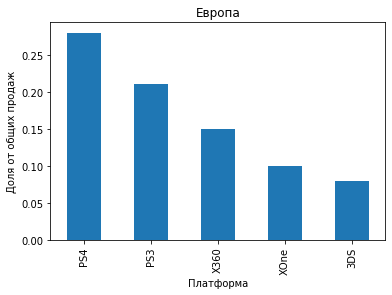

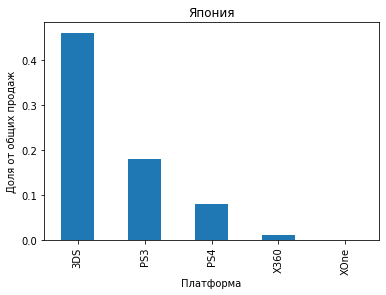

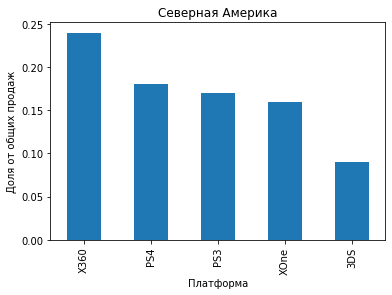

In [46]:
# для красоты оформления сделаем словарик регионов
region_dic = {'eu_sales': 'Европа', 'jp_sales': 'Япония', 'na_sales': 'Северная Америка'}

for i in ['eu_sales', 'jp_sales', 'na_sales']:
    region_sales[i].head(5).sort_values( ascending=False).plot(kind='bar', title=region_dic[i])
    plt.xlabel("Платформа")
    plt.ylabel("Доля от общих продаж")
    plt.show()

В Северной Америке разница в предпочтениях пользователей выражена менее всего. В Японии более 45% всех проданных игр приходится на Nintendo3DS, и американские Xbox совсем не пользуются спросом. В Европе Sony PlayStation обгоняет по продажам Хbox.

### Рейтинг жанров

Посмотрим какие жанры популярны в разных регионах.

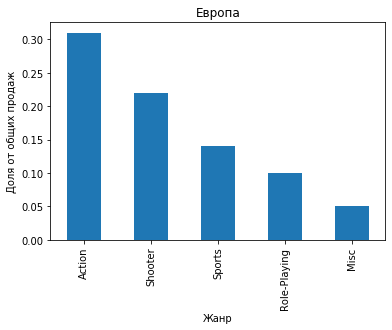

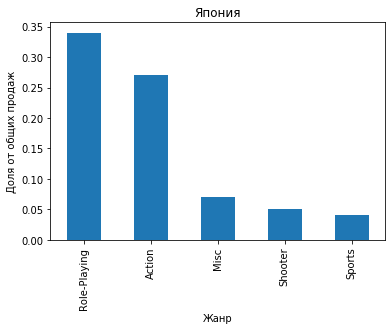

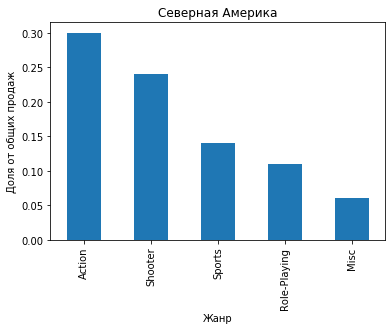

In [47]:
genre_sales = games_act.pivot_table(
    index='genre', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

genre_sales['eu_sales'] = (genre_sales['eu_sales'] / genre_sales['eu_sales'].sum()).round(2)
genre_sales['na_sales'] = (genre_sales['na_sales'] / genre_sales['na_sales'].sum()).round(2)
genre_sales['jp_sales'] = (genre_sales['jp_sales'] / genre_sales['jp_sales'].sum()).round(2)

for i in ['eu_sales', 'jp_sales', 'na_sales']:
    genre_sales[i].head(5).sort_values( ascending=False).plot(kind='bar', title=region_dic[i])
    plt.xlabel("Жанр")
    plt.ylabel("Доля от общих продаж")
    plt.show()

Европа и Северная Америка не отличаются друг от друга пользовательскими предпочтениями. Вероятно из-за влияния аниме культуры ролевые игры в Японии лидирут по продажам. Вместе с этим Стрелялки и Спорт не пользуются таким спросом как в Европе и в Америке. 

### Рейтинг ESRB и продажи

Рейтинг ESRB - ограничение игр по возрасту

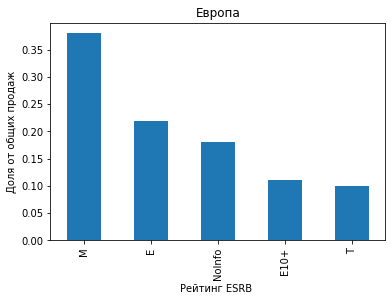

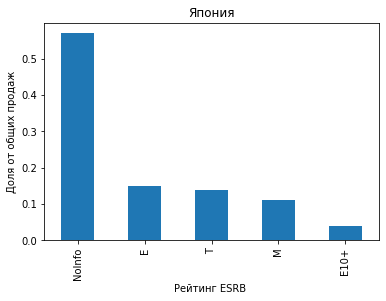

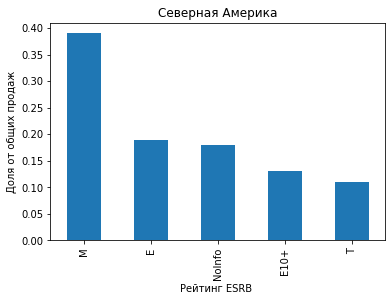

In [48]:
rating_sales = games_act.pivot_table(
    index='rating', 
    values=['na_sales', 'eu_sales', 'jp_sales', 'total_sales'], 
    aggfunc='sum'
).sort_values(by='total_sales', ascending=False)

rating_sales['eu_sales'] = (rating_sales['eu_sales'] / rating_sales['eu_sales'].sum()).round(2)
rating_sales['na_sales'] = (rating_sales['na_sales'] / rating_sales['na_sales'].sum()).round(2)
rating_sales['jp_sales'] = (rating_sales['jp_sales'] / rating_sales['jp_sales'].sum()).round(2)

for i in ['eu_sales', 'jp_sales', 'na_sales']:
    rating_sales[i].head(5).sort_values( ascending=False).plot(kind='bar', title=region_dic[i])
    plt.xlabel("Рейтинг ESRB ")
    plt.ylabel("Доля от общих продаж")
    plt.show()

Больше 50% игр японского рынка не имеют рейтинга ESRB. Причина в том что рейтинг ESRB -- североамериканский. Следовательно использовать его для исследования японского и европейского рынков не совсем правильно (там есть свои CERO и PEGI рейтинги).

Если судить по тем играм у которых известен рейтинг, то можно сделать вывод, что на японском рынке лидируют игры расчитанные на более младший возраст чем в Северной Америке и Европе. 


## 4. Проверка гипотез

### Средние пользовательские рейтинги Xbox One и PC

Сравним распределение пользовательских рейтингов платформ Xbox One и PC.

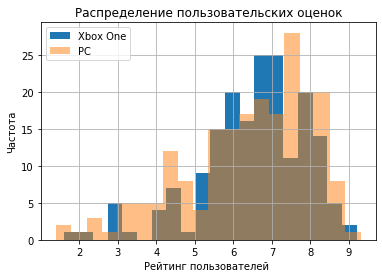

In [49]:
xone = games_act.query('platform == "XOne"')['user_score'].dropna()
pc = games_act.query('platform == "PC"')['user_score'].dropna()

xone.hist(bins=(20), label="Xbox One")
pc.hist(bins=(20), alpha=0.5, label="PC")
plt.legend()
plt.title('Распределение пользовательских оценок')
plt.xlabel("Рейтинг пользователей ")
plt.ylabel("Частота")
plt.show()

In [50]:
print('Дисперсия оценок Xbox One', np.var(xone))
print('Дисперсия оценок PC', np.var(pc))

Дисперсия оценок Xbox One 1.8965188383045526
Дисперсия оценок PC 2.7569952398906588


Дисперсии пользовательских оценок не равны.
Проверим статистические гипотезы
За нулевую гипотезу примем утверждение, что средние пользовательские оценки двух платформ не различается.


In [51]:
alpha = 0.05 # критический уровень статистической значимости принимаем 0,5
            # если p-value окажется меньше него - отвергнем гипотезу 
    
results = st.ttest_ind(
    xone, 
    pc,
    equal_var = False # зададим 'False' так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Средние значения пользовательских оценок отличаются. Если предположить, что они на самом деле равны а это расхождение случайно, то вероятность получить такое расхождение 55%. Статистически значимой разницы нет.

### Средние пользовательские рейтинги жанров Action и Sports

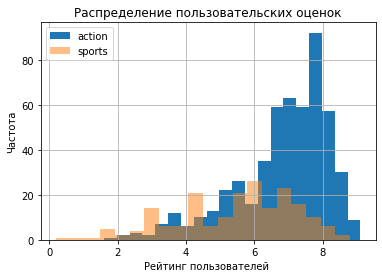

In [52]:
action = games_act.query('genre == "Action"')['user_score'].dropna()
sports = games_act.query('genre == "Sports"')['user_score'].dropna()

action.hist(bins=(20), label="action")
sports.hist(bins=(20), alpha=0.5, label="sports")
plt.legend()
plt.title('Распределение пользовательских оценок')
plt.xlabel("Рейтинг пользователей ")
plt.ylabel("Частота")
plt.show()

In [53]:
print('Дисперсия оценок Action', np.var(action))
print('Дисперсия оценок Sports', np.var(sports))

Дисперсия оценок Action 1.8820750539012878
Дисперсия оценок Sports 3.0073882971729127


In [54]:
alpha = 0.05 
    
results = st.ttest_ind(
    action, 
    sports,
    equal_var = False # 'False' так как дисперсии отличаются
)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.305337670692197e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу. Если предположить, что средние пользовательские рейтинги равны, то вероятность получить случайно такое расхождение практически нулевая.


## Общий вывод


На конец 2016 года остались две актуальные и современные игровые платформы. Обе они являются стационарными, портативные вытесняются смартфонами и планшетами. Большинство новых игр скорей всего будут выходить на них и на PС.

Если ориентироваться на платформу, то нужно учитывать рынок: на японском и европейском рынке исторически популярней платформы от Sony, чем от Microsoft, по этому там будут больше продаваться игры на PS4, для рынка Северной Америки чуть выше будут продажи на платформе Xbox.

На европейском и североамериканском рынках лидируют игры расчитанные на взрослых от 17-лет, на японском больше 60% продаваемых игр расчитаны на всех (от 6лет) или на тинейджеров (от 13 лет). Напрашивается вывод, что в японии в среднем пользователи младше чем в европе и америке, но что бы это утверждать требуется дополнительное исследование не игр, а непосредственно пользователей.

Рейтинги пользователей и рейтинги критиков никак не влияют на продажи. Среди игр с низкими продажами есть игры как с высоким так и снизким рейтингом. И наоборот, рейтинг может быть одинаково высок, а продажи у игр будут разные. 

Лидеры продаж среди жанров -- Shoter, Sports и Platform, их средние количество продаж значительно выше остальных. Самые плохопродаваемые жанры Puzzle и Adventure. 

Если наложить друг на друга рейтинг общего количество продаж по жанрам и рейтинг среднего уровня продаж, то самыми перспективными жанрами окажутся Shoter и Sports. Эти жанры и глобально продаются больше, и среднее количество продаж у них выше остальных. 
